# How in-demand skills trending for Machine Learning Engineer in India?

## Steps:
1. **Aggregate skill counts monthly**
2. **Re-analyze based on percentage of total jobs**
3. **Calculate and plot the monthly skill demand**

In [122]:
import pandas as pd
import ast

from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # job skills coloumn is converted to list

In [123]:
df_ml_India = df[(df["job_country"] == "India") & (df["job_title_short"] == "Machine Learning Engineer")].copy()
df_ml_India

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1209,Machine Learning Engineer,Computer Vision Developer (R&D),"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-02-18 13:12:30,False,False,India,year,79200.0,NaN,Bosch Group,"[python, opencv, tensorflow, pytorch, keras, m...","{'libraries': ['opencv', 'tensorflow', 'pytorc..."
3080,Machine Learning Engineer,Machine Learning Scientist - NLP,"New Delhi, Delhi, India",via Zenon Careers,Full-time,False,India,2023-11-05 13:09:06,False,False,India,None,NaN,NaN,Zenon Analytics,"[aws, azure, gcp, tensorflow, pytorch]","{'cloud': ['aws', 'azure', 'gcp'], 'libraries'..."
4498,Machine Learning Engineer,Python With ML Engineer,"Hyderabad, Telangana, India",via LinkedIn,Full-time,False,India,2023-11-30 13:13:25,False,False,India,None,NaN,NaN,Navtech,"[python, aws, tensorflow, pytorch, scikit-learn]","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4528,Machine Learning Engineer,Sr. Machine Learning Engineer,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-02-26 13:08:37,False,False,India,None,NaN,NaN,Cardinal Health,"[python, gcp, tensorflow, jenkins]","{'cloud': ['gcp'], 'libraries': ['tensorflow']..."
5695,Machine Learning Engineer,MDM Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-05-11 13:20:19,False,False,India,None,NaN,NaN,Wenger & Watson Inc,"[sql, python, java, sql server, db2, mysql, or...","{'analyst_tools': ['sap'], 'cloud': ['oracle']..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782023,Machine Learning Engineer,Machine Learning Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-07-03 06:33:13,False,False,India,None,NaN,NaN,_VOIS,"[python, scala, java, javascript, sql, nosql, ...","{'cloud': ['aws', 'gcp', 'azure'], 'databases'..."
782164,Machine Learning Engineer,Machine Learning Engineer,"Hyderabad, Telangana, India",via SmartRecruiters Job Search,Full-time,False,India,2023-01-09 06:08:24,False,False,India,None,NaN,NaN,ServiceNow,"[python, azure]","{'cloud': ['azure'], 'programming': ['python']}"
784766,Machine Learning Engineer,Data and Machine Learning Engineer,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-01-09 06:08:10,False,False,India,None,NaN,NaN,Networth Corp,"[no-sql, python, sql, scala, azure, databricks...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
785183,Machine Learning Engineer,NEEM,"South Goa, Goa, India",via Talents Jobs,Full-time,False,India,2023-11-20 06:12:46,False,False,India,None,NaN,NaN,Data Science and Analytics Helping Hand Recrui...,None,None


In [124]:
df_ml_India["month_no"] = df_ml_India["job_posted_date"].dt.month

df_ml_India_exploded = df_ml_India.explode("job_skills")

df_ml_India_exploded.sample(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,month_no
737667,Machine Learning Engineer,Machine Learning Implementation Engineer,Anywhere,via AngelList,Full-time,True,India,2023-04-14 21:33:16,False,False,India,None,NaN,NaN,OfferFit,css,"{'cloud': ['gcp'], 'libraries': ['airflow'], '...",4
584828,Machine Learning Engineer,Machine Learning Engineer,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-05-25 09:25:34,False,False,India,year,166000.0,NaN,Ethos,go,"{'cloud': ['aws', 'azure'], 'libraries': ['ten...",5
65834,Machine Learning Engineer,MLOps Engineer,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-07-28 06:10:50,False,False,India,None,NaN,NaN,Analytics India Magazine,azure,"{'cloud': ['aws', 'azure', 'gcp'], 'libraries'...",7


In [125]:
df_ml_India_pivot = df_ml_India_exploded.pivot_table(index="month_no", columns="job_skills", aggfunc="size", fill_value=0)
df_ml_India_pivot.loc["total"] = df_ml_India_pivot.sum() # to arrange in terms of total and not alphabetical order

df_ml_India_pivot = df_ml_India_pivot[df_ml_India_pivot.loc["total"].sort_values(ascending=False).index] #get the index of the sorted columns and then pass the same to the df_ml_India_pivot
df_ml_India_pivot = df_ml_India_pivot.drop("total") 
df_ml_India_pivot

job_skills,python,tensorflow,pytorch,aws,sql,azure,spark,docker,scikit-learn,kubernetes,...,elixir,ggplot2,rshiny,react.js,qlik,slack,svn,spring,terminal,vue
month_no,,,,,,,,,,,,,,,,,,,,,
1,49,28,21,20,28,23,12,14,9,13,...,0,0,0,1,0,0,0,0,0,0
2,29,13,15,12,14,10,15,10,7,7,...,0,0,0,0,0,0,0,0,0,0
3,29,18,12,12,11,13,11,5,7,6,...,0,0,0,0,0,0,0,0,0,0
4,36,19,16,17,21,12,11,8,11,14,...,0,1,1,0,0,0,0,0,0,1
5,22,9,9,13,11,6,7,7,6,7,...,0,0,0,0,0,0,0,0,0,0
6,37,18,19,12,14,9,8,9,12,7,...,0,0,0,0,0,0,0,0,0,0
7,39,22,22,23,21,10,13,14,10,13,...,0,0,0,0,1,0,0,0,0,0
8,31,15,15,14,18,15,7,9,6,11,...,0,0,0,0,0,0,0,0,0,0
9,48,21,23,15,13,11,15,13,14,15,...,0,0,0,0,0,0,0,1,0,0


In [126]:
df_totals = df_ml_India.groupby("month_no").size()
df_totals

month_no
1     70
2     42
3     34
4     54
5     31
6     41
7     54
8     47
9     67
10    85
11    52
12    94
dtype: int64

In [127]:
df_ml_India_percentage = df_ml_India_pivot.div(df_totals/100, axis=0)
df_ml_India_percentage

job_skills,python,tensorflow,pytorch,aws,sql,azure,spark,docker,scikit-learn,kubernetes,...,elixir,ggplot2,rshiny,react.js,qlik,slack,svn,spring,terminal,vue
month_no,,,,,,,,,,,,,,,,,,,,,
1,70.000000,40.000000,30.000000,28.571429,40.000000,32.857143,17.142857,20.000000,12.857143,18.571429,...,0.00000,0.000000,0.000000,1.428571,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,69.047619,30.952381,35.714286,28.571429,33.333333,23.809524,35.714286,23.809524,16.666667,16.666667,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,85.294118,52.941176,35.294118,35.294118,32.352941,38.235294,32.352941,14.705882,20.588235,17.647059,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,66.666667,35.185185,29.629630,31.481481,38.888889,22.222222,20.370370,14.814815,20.370370,25.925926,...,0.00000,1.851852,1.851852,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.851852
5,70.967742,29.032258,29.032258,41.935484,35.483871,19.354839,22.580645,22.580645,19.354839,22.580645,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
6,90.243902,43.902439,46.341463,29.268293,34.146341,21.951220,19.512195,21.951220,29.268293,17.073171,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
7,72.222222,40.740741,40.740741,42.592593,38.888889,18.518519,24.074074,25.925926,18.518519,24.074074,...,0.00000,0.000000,0.000000,0.000000,1.851852,0.00000,0.000000,0.000000,0.000000,0.000000
8,65.957447,31.914894,31.914894,29.787234,38.297872,31.914894,14.893617,19.148936,12.765957,23.404255,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
9,71.641791,31.343284,34.328358,22.388060,19.402985,16.417910,22.388060,19.402985,20.895522,22.388060,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.492537,0.000000,0.000000


In [128]:
df_ml_India_percentage.reset_index(inplace=True)
df_ml_India_percentage


job_skills,month_no,python,tensorflow,pytorch,aws,sql,azure,spark,docker,scikit-learn,...,elixir,ggplot2,rshiny,react.js,qlik,slack,svn,spring,terminal,vue
0,1,70.000000,40.000000,30.000000,28.571429,40.000000,32.857143,17.142857,20.000000,12.857143,...,0.00000,0.000000,0.000000,1.428571,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,2,69.047619,30.952381,35.714286,28.571429,33.333333,23.809524,35.714286,23.809524,16.666667,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,3,85.294118,52.941176,35.294118,35.294118,32.352941,38.235294,32.352941,14.705882,20.588235,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,4,66.666667,35.185185,29.629630,31.481481,38.888889,22.222222,20.370370,14.814815,20.370370,...,0.00000,1.851852,1.851852,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.851852
4,5,70.967742,29.032258,29.032258,41.935484,35.483871,19.354839,22.580645,22.580645,19.354839,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5,6,90.243902,43.902439,46.341463,29.268293,34.146341,21.951220,19.512195,21.951220,29.268293,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
6,7,72.222222,40.740741,40.740741,42.592593,38.888889,18.518519,24.074074,25.925926,18.518519,...,0.00000,0.000000,0.000000,0.000000,1.851852,0.00000,0.000000,0.000000,0.000000,0.000000
7,8,65.957447,31.914894,31.914894,29.787234,38.297872,31.914894,14.893617,19.148936,12.765957,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
8,9,71.641791,31.343284,34.328358,22.388060,19.402985,16.417910,22.388060,19.402985,20.895522,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.492537,0.000000,0.000000
9,10,71.764706,43.529412,49.411765,36.470588,28.235294,31.764706,20.000000,20.000000,20.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,1.176471,0.000000,0.000000,0.000000


In [129]:
df_ml_India_percentage["job_posted_month"] = df_ml_India_percentage["month_no"].apply(lambda x: pd.to_datetime(x, format="%m").strftime("%b"))
df_ml_India_percentage

job_skills,month_no,python,tensorflow,pytorch,aws,sql,azure,spark,docker,scikit-learn,...,ggplot2,rshiny,react.js,qlik,slack,svn,spring,terminal,vue,job_posted_month
0,1,70.000000,40.000000,30.000000,28.571429,40.000000,32.857143,17.142857,20.000000,12.857143,...,0.000000,0.000000,1.428571,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Jan
1,2,69.047619,30.952381,35.714286,28.571429,33.333333,23.809524,35.714286,23.809524,16.666667,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Feb
2,3,85.294118,52.941176,35.294118,35.294118,32.352941,38.235294,32.352941,14.705882,20.588235,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Mar
3,4,66.666667,35.185185,29.629630,31.481481,38.888889,22.222222,20.370370,14.814815,20.370370,...,1.851852,1.851852,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.851852,Apr
4,5,70.967742,29.032258,29.032258,41.935484,35.483871,19.354839,22.580645,22.580645,19.354839,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,May
5,6,90.243902,43.902439,46.341463,29.268293,34.146341,21.951220,19.512195,21.951220,29.268293,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Jun
6,7,72.222222,40.740741,40.740741,42.592593,38.888889,18.518519,24.074074,25.925926,18.518519,...,0.000000,0.000000,0.000000,1.851852,0.00000,0.000000,0.000000,0.000000,0.000000,Jul
7,8,65.957447,31.914894,31.914894,29.787234,38.297872,31.914894,14.893617,19.148936,12.765957,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Aug
8,9,71.641791,31.343284,34.328358,22.388060,19.402985,16.417910,22.388060,19.402985,20.895522,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.492537,0.000000,0.000000,Sep
9,10,71.764706,43.529412,49.411765,36.470588,28.235294,31.764706,20.000000,20.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.176471,0.000000,0.000000,0.000000,Oct


In [130]:
df_ml_India_percentage.set_index("job_posted_month", inplace=True)
df_ml_India_percentage.drop(columns="month_no", inplace=True)
df_ml_India_percentage

job_skills,python,tensorflow,pytorch,aws,sql,azure,spark,docker,scikit-learn,kubernetes,...,elixir,ggplot2,rshiny,react.js,qlik,slack,svn,spring,terminal,vue
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,70.000000,40.000000,30.000000,28.571429,40.000000,32.857143,17.142857,20.000000,12.857143,18.571429,...,0.00000,0.000000,0.000000,1.428571,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Feb,69.047619,30.952381,35.714286,28.571429,33.333333,23.809524,35.714286,23.809524,16.666667,16.666667,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Mar,85.294118,52.941176,35.294118,35.294118,32.352941,38.235294,32.352941,14.705882,20.588235,17.647059,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Apr,66.666667,35.185185,29.629630,31.481481,38.888889,22.222222,20.370370,14.814815,20.370370,25.925926,...,0.00000,1.851852,1.851852,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.851852
May,70.967742,29.032258,29.032258,41.935484,35.483871,19.354839,22.580645,22.580645,19.354839,22.580645,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Jun,90.243902,43.902439,46.341463,29.268293,34.146341,21.951220,19.512195,21.951220,29.268293,17.073171,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Jul,72.222222,40.740741,40.740741,42.592593,38.888889,18.518519,24.074074,25.925926,18.518519,24.074074,...,0.00000,0.000000,0.000000,0.000000,1.851852,0.00000,0.000000,0.000000,0.000000,0.000000
Aug,65.957447,31.914894,31.914894,29.787234,38.297872,31.914894,14.893617,19.148936,12.765957,23.404255,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Sep,71.641791,31.343284,34.328358,22.388060,19.402985,16.417910,22.388060,19.402985,20.895522,22.388060,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.492537,0.000000,0.000000


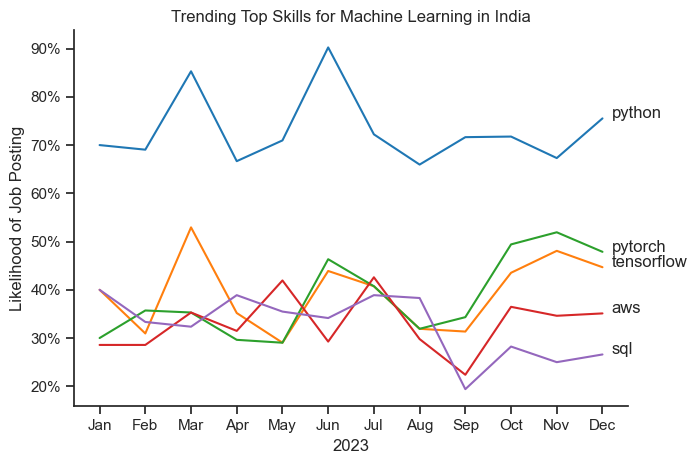

In [177]:

df_plot = df_ml_India_percentage.iloc[:, :5] # only top 5 skills

sns.set_theme(style="ticks")
sns.lineplot(data=df_plot, dashes=False, palette="tab10")
sns.despine()

plt.title("Trending Top Skills for Machine Learning in India")
plt.ylabel("Likelihood of Job Posting")
plt.xlabel("2023")
plt.legend().remove()
plt.tight_layout()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter())


for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i]) # plt.text(x_co-ordinate, y_co-ordinate, text)
